In [1]:
#importando as principais bibliotecas

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importando os catálogos mock 

N = 1000
for i in range(N):
    
    mock = np.genfromtxt('mocks/mock_'+str(i)+'.dat')
    
    r = mock[:, 0] #RA
    a = mock[:, 1] #dec
    d = mock[:, 2] #distância
    
    X = mock[:, 3]
    
    # plt.scatter(a, d, s=0.1, color='blue')
    
    c0 = (r>20.) & (r<85.) & (X<0.)  #considerando intervalo de 20 a 85 Mpc

#filtrando os dados pelo intervalo de 20 a 85 Mpc
    x0 = a[c0]
    y0 = d[c0]
    d0 = r[c0]

#definindo o hemisfério norte
    c1 = (y0>0.) & (y0<36.)

    x1 = x0[c1]
    y1 = y0[c1]
    d1 = d0[c1]
    
    c2 = (x1>50.) & (x1<110.)
    
    x2 = np.delete(x1, c2)
    y2 = np.delete(y1, c2)
    d2 = np.delete(d1, c2)
    
    c3 = (x2>250.) & (x2<325.)
    
    x3 = np.delete(x2, c3)
    y3 = np.delete(y2, c3)
    d3 = np.delete(d2, c3)
    
    c4 = (x3>110.) & (x3<140.) & (y3>18.) & (y3<24.)
    
    x4 = np.delete(x3, c4)
    y4 = np.delete(y3, c4)
    d4 = np.delete(d3, c4)
    
    c5 = (x4>232.) & (x4<250.) & (y4>18.) & (y4<24.)
    
    x5 = np.delete(x4, c5)
    y5 = np.delete(y4, c5)
    d5 = np.delete(d4, c5)
    
    c6 = (x5>232.) & (x5<250.) & (y5>32.) & (y5<36.)
    
    x6 = np.delete(x5, c6)
    y6 = np.delete(y5, c6)
    d6 = np.delete(d5, c6)
    
    c7 = (x6>110.) & (x6<140.) & (y6>32.) & (y6<36.)
    
    x7 = np.delete(x6, c7)
    y7 = np.delete(y6, c7)
    d7 = np.delete(d6, c7)

        # number density
    
    dH = np.histogram(d7, bins=20)
    
    dN = dH[0]
    dr = dH[1]
    
    rb = (dr[1:] + dr[:-1]) * 0.5
    
    #plt.scatter(rb, dN, c='red')
    
    fsky = 4500 / 41253
    
    dV = 4. * np.pi * fsky * (rb ** 2) * (dr[1:]-dr[:-1])
    
    n = dN / dV
    
    # plt.loglog()
    # plt.scatter(rb, n)
    # plt.show()
    
    # P0 = 2000

    P0 =0
    
    w = 1. / (1. + (n * P0))
    
    #plt.scatter(rb, w)
    
    from scipy.interpolate import CubicSpline
    
    def fw(x):
        
        fw = CubicSpline(rb, w)
        
        return fw(x)
    
    x = np.linspace(min(rb), max(rb), 1000)
    
    #plt.plot(x, fw(x), color='red')
    
    from astropy.coordinates import spherical_to_cartesian
    
    X, Y, Z = spherical_to_cartesian(d7, np.deg2rad(y7), np.deg2rad(x7))
    
    ################
    H = X, Y, Z, fw(d7), d7
    
    np.savetxt('mocks_cut/mock_'+str(i)+'.dat', np.transpose(H), delimiter='\t',
               header='x y z w r')
    
    # plt.scatter(X, Y, s=1)
            
#criando o catálogo cm base nos mocks

import randomsdss

mock = np.genfromtxt('mocks_cut/mock_0.dat',delimiter='\t')

r = mock[:, -1]

c = 3. * (10 ** 5)

z = (70*r) / c

N = 100000

x_rand = np.random.uniform(0., 360., N)

y_rand = np.random.uniform(np.sin(np.deg2rad(-90.)), np.sin(np.deg2rad(+90.)), N)
y_rand = np.rad2deg(np.arcsin(y_rand))

#plt.scatter(x_rand, y_rand, s=1)


#sky footprint cut

c1 = (y_rand>0.) & (y_rand<36.)

x1r = x_rand[c1]
y1r = y_rand[c1]

c2 = (x1r>50.) & (x1r<110.)

x2r = np.delete(x1r, c2)
y2r = np.delete(y1r, c2)

c3 = (x2r>250.) & (x2r<325.)

x3r = np.delete(x2r, c3)
y3r = np.delete(y2r, c3)

c4 = (x3r>110.) & (x3r<140.) & (y3r>18.) & (y3r<24.)

x4r = np.delete(x3r, c4)
y4r = np.delete(y3r, c4)

c5 = (x4r>232.) & (x4r<250.) & (y4r>18.) & (y4r<24.)

x5r = np.delete(x4r, c5)
y5r = np.delete(y4r, c5)

c6 = (x5r>232.) & (x5r<250.) & (y5r>32.) & (y5r<36.)

x6r = np.delete(x5r, c6)
y6r = np.delete(y5r, c6)

c7 = (x6r>110.) & (x6r<140.) & (y6r>32.) & (y6r<36.)

x7r = np.delete(x6r, c7)
y7r = np.delete(y6r, c7)

#distribuição do redshift

zr = randomsdss.z_random(z, size=len(x7r))

dr = c * zr / 70.

# plt.hist(dr, bins=30)
# plt.show()

from astropy.coordinates import spherical_to_cartesian

X, Y, Z = spherical_to_cartesian(dr, np.deg2rad(y7r), np.deg2rad(x7r))


N = X[X<0], Y[X<0], Z[X<0], fw(dr[X<0])

np.savetxt('random.dat', np.transpose(N), delimiter='\t', 
           header='x y z w')


# plt.scatter(X[X<0], Y[X<0], s=0.1)

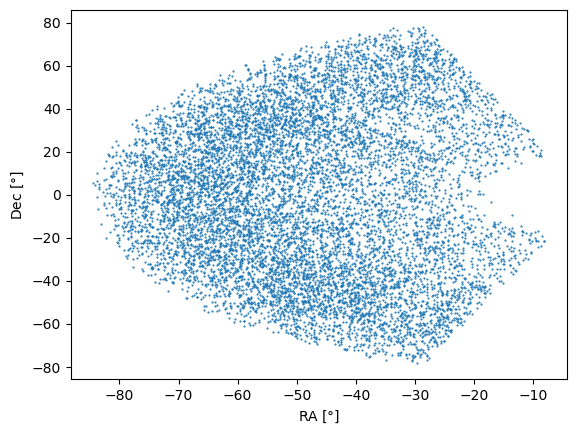

In [9]:
plt.scatter(X[X<0], Y[X<0], s=0.3)
plt.xlabel(r'RA [$\degree$]')
plt.ylabel(r'Dec [$\degree$]')
plt.savefig('mock-footprint.pdf')